#### Faça a leitura do arquivo `movies.csv`

column_names = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre']

1. Qual o filme com o maior lucro?
2. Qual o filme que deu o maior prejuízo
3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)


4. Uma plotagem do genero do filme.
Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)
6. Qual o Genero mais popular e menos popular?
7. Existe relação entre os melhores filme e seu Budget?
8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
9. Mostre num gráfico a quantidade de filmes ao passar do ano

In [36]:
# preparando o ambiente de trabalho
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
# carregando a base de dados
df_movies = pd.read_csv('/content/drive/My Drive/movies.csv', sep='|', names=['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre'])
df_movies

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,"237,000,000.0",2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,"300,000,000.0",2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,"245,000,000.0",2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,"250,000,000.0",2012.0,8.5,Action
4,?,Doug Walker,?,?,?,Star Wars: Episode VII - The Force Awakens ...,?,?,?,?,?,7.1,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Color,James Gunn,653.0,121.0,333130696.0,Guardians of the Galaxy,1097.0,USA,PG-13,"170,000,000.0",2014.0,8.1,Action
96,Color,Christopher Nolan,712.0,169.0,187991439.0,Interstellar,2725.0,USA,PG-13,"165,000,000.0",2014.0,8.6,Adventure
97,Color,Christopher Nolan,642.0,148.0,292568851.0,Inception,2803.0,USA,PG-13,"160,000,000.0",2010.0,8.8,Action
98,Color,Hideaki Anno,1.0,120.0,?,Godzilla Resurgence,13.0,Japan,?,?,2016.0,8.2,Action


In [6]:
# conhecendo a composição dos dados das séries
df_movies.dtypes

,0
color,object
director_name,object
num_critic_for_reviews,object
duration,object
gross,object
movie_title,object
num_user_for_reviews,object
country,object
cotent_rating,object
budget,object


In [8]:
# investigando possíveis inconsistências
df_movies.head(5)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,"237,000,000.0",2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,"300,000,000.0",2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,"245,000,000.0",2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,"250,000,000.0",2012.0,8.5,Action
4,?,Doug Walker,?,?,?,Star Wars: Episode VII - The Force Awakens ...,?,?,?,?,?,7.1,Documentary


In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   100 non-null    object 
 1   director_name           100 non-null    object 
 2   num_critic_for_reviews  100 non-null    object 
 3   duration                100 non-null    object 
 4   gross                   100 non-null    object 
 5   movie_title             100 non-null    object 
 6   num_user_for_reviews    100 non-null    object 
 7   country                 100 non-null    object 
 8   cotent_rating           100 non-null    object 
 9   budget                  100 non-null    object 
 10  title_year              100 non-null    object 
 11  imdb_score              100 non-null    float64
 12  genre                   100 non-null    object 
dtypes: float64(1), object(12)
memory usage: 10.3+ KB


In [13]:
# identificando os tipos incosistências
df_movies.isin(['?']).sum()

,0
color,1
director_name,0
num_critic_for_reviews,0
duration,0
gross,0
movie_title,0
num_user_for_reviews,0
country,0
cotent_rating,0
budget,0


In [15]:
# tratando os dados pelas colunas
colunas = ['num_critic_for_reviews', 'duration', 'gross', 'num_user_for_reviews',
                 'country', 'cotent_rating', 'budget', 'title_year']

df_movies[colunas] = df_movies[colunas].replace('?', np.nan)

df_movies.head(5)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,"237,000,000.0",2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,"300,000,000.0",2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,"245,000,000.0",2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,"250,000,000.0",2012.0,8.5,Action
4,?,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,,,,,7.1,Documentary


In [21]:
# tratando os dados pelas colunas que foram alterados erradamente
colunas = ['country', 'cotent_rating', 'budget', 'title_year']

df_movies[colunas] = df_movies[colunas].replace(np.nan, '')
df_movies['color'] = df_movies['color'].replace('?', '')

df_movies.head(5)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,"237,000,000.0",2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,"300,000,000.0",2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,"245,000,000.0",2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,"250,000,000.0",2012.0,8.5,Action
4,,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,,,,,7.1,Documentary


In [22]:
# tratando os dados pelas colunas que foram alterados erradamente
colunas = ['budget', 'title_year']

df_movies[colunas] = df_movies[colunas].replace('', np.nan)

df_movies.head(5)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,"237,000,000.0",2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,"300,000,000.0",2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,"245,000,000.0",2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,"250,000,000.0",2012.0,8.5,Action
4,,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,,,NaN,NaN,7.1,Documentary


In [26]:
# identificando se ainda há incosistências nos dados
# df_movies.isin(['?']).sum()
df_movies.isin(['NaN']).sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
gross,0
movie_title,0
num_user_for_reviews,0
country,0
cotent_rating,0
budget,0


In [27]:
# Convertendo as colunas para o tipo correto
df_movies['num_critic_for_reviews'] = pd.to_numeric(df_movies['num_critic_for_reviews'], errors='coerce')
df_movies['duration'] = pd.to_numeric(df_movies['duration'], errors='coerce')
df_movies['gross'] = pd.to_numeric(df_movies['gross'], errors='coerce')
df_movies['num_user_for_reviews'] = pd.to_numeric(df_movies['num_user_for_reviews'], errors='coerce')
df_movies['budget'] = df_movies['budget'].str.replace(',', '').astype(float, errors='ignore')
df_movies['title_year'] = pd.to_numeric(df_movies['title_year'], errors='coerce')

In [30]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   100 non-null    object 
 1   director_name           100 non-null    object 
 2   num_critic_for_reviews  99 non-null     float64
 3   duration                99 non-null     float64
 4   gross                   97 non-null     float64
 5   movie_title             100 non-null    object 
 6   num_user_for_reviews    99 non-null     float64
 7   country                 100 non-null    object 
 8   cotent_rating           100 non-null    object 
 9   budget                  96 non-null     float64
 10  title_year              99 non-null     float64
 11  imdb_score              100 non-null    float64
 12  genre                   100 non-null    object 
dtypes: float64(7), object(6)
memory usage: 10.3+ KB


In [31]:
# 1. Qual o filme com o maior lucro?
df_movies['profit'] = df_movies['gross'] - df_movies['budget']

max_profit_movie = df_movies.loc[df_movies['profit'].idxmax()]

print(f"O filme com o maior lucro é '{max_profit_movie['movie_title']}' com um lucro de ${max_profit_movie['profit']:.2f}.")

# observe a inconsistência de um espaço a mais após o nome do filme (faltou!)

O filme com o maior lucro é 'Avatar ' com um lucro de $523505847.00.


In [46]:
# atualizando a referencia da base de dados
df_movies.head(10)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre,profit
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,237000000.0,2009.0,7.9,Action,523505847.0
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,300000000.0,2007.0,7.1,Action,9404152.0
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,245000000.0,2015.0,6.8,Action,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,250000000.0,2012.0,8.5,Action,198130642.0
4,,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,,,NaN,NaN,7.1,Documentary,NaN
5,Color,Andrew Stanton,462.0,132.0,73058679.0,John Carter,738.0,USA,PG-13,263700000.0,2012.0,6.6,Action,-190641321.0
6,Color,Sam Raimi,392.0,156.0,336530303.0,Spider-Man 3,1902.0,USA,PG-13,258000000.0,2007.0,6.2,Action,78530303.0
7,Color,Nathan Greno,324.0,100.0,200807262.0,Tangled,387.0,USA,PG,260000000.0,2010.0,7.8,Adventure,-59192738.0
8,Color,Joss Whedon,635.0,141.0,458991599.0,Avengers: Age of Ultron,1117.0,USA,PG-13,250000000.0,2015.0,7.5,Action,208991599.0
9,Color,David Yates,375.0,153.0,301956980.0,Harry Potter and the Half-Blood Prince,973.0,UK,PG,250000000.0,2009.0,7.5,Adventure,51956980.0


In [33]:
# Qual o filme que deu o maior prejuízo
min_profit_movie = df_movies.loc[df_movies['profit'].idxmin()]

print(f"O filme com o maior prejuízo é '{min_profit_movie['movie_title']}' com um prejuízo de ${min_profit_movie['profit']:.2f}.")

O filme com o maior prejuízo é 'John Carter ' com um prejuízo de $-190641321.00.


Text(20.250000000000007, 0.5, 'Budget')

<Figure size 1000x600 with 0 Axes>

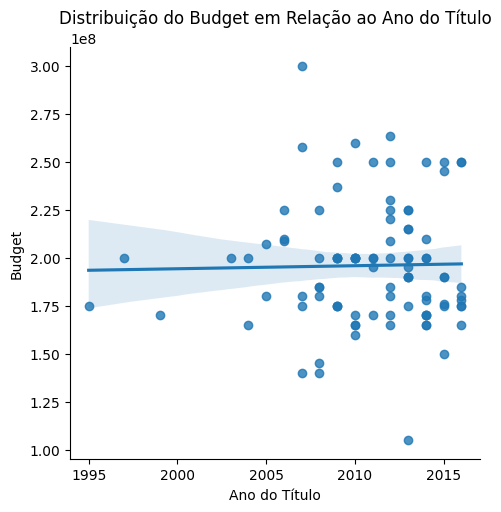

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
# Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)

# Filtrando valores não nulos de budget e title_year
df_budget_by_year = df_movies.dropna(subset=['budget', 'title_year'])

plt.figure(figsize=(10, 6))

sns.lmplot(x='title_year', y='budget', data=df_budget_by_year)

plt.title('Distribuição do Budget em Relação ao Ano do Título')
plt.xlabel('Ano do Título')
plt.ylabel('Budget')

In [41]:
# Agrupa por gênero e calcula a média do IMDb score
genre_avg_score = df_movies.groupby('genre')['imdb_score'].mean().sort_values(ascending=False).head(10)

genre_avg_score_df = genre_avg_score.reset_index()

genre_avg_score_df

,genre,imdb_score
0,Drama,7.500000
1,Adventure,7.384000
2,Documentary,7.100000
3,Action,6.867143
4,Animation,6.800000
5,Comedy,5.400000


<ipython-input-67-c48b0d7858e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='imdb_score', x='genre', data=genre_avg_score_df, palette='colorblind')


Text(0.5, 0, 'Gênero')

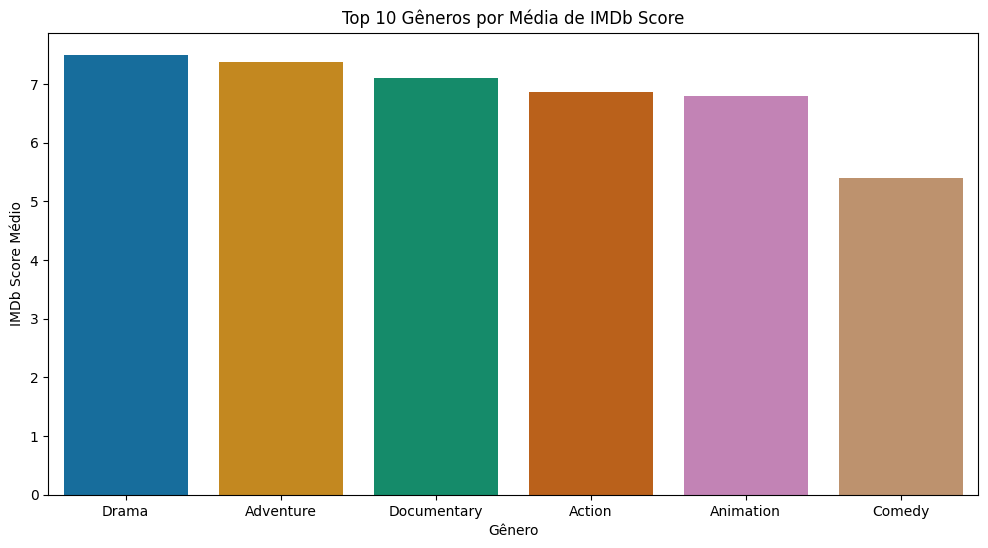

In [67]:
# plotando o gráfico
plt.figure(figsize=(12, 6))

sns.barplot(y='imdb_score', x='genre', data=genre_avg_score_df, palette='colorblind')

plt.title('Top 10 Gêneros por Média de IMDb Score')
plt.ylabel('IMDb Score Médio')
plt.xlabel('Gênero')

In [47]:
# Qual o Genero mais popular e menos popular?
genre_counts = df_movies['genre'].value_counts()

# mais popular
most_popular_genre = genre_counts.idxmax()
most_popular_count = genre_counts.max()

# menos popular
least_popular_genre = genre_counts.idxmin()
least_popular_count = genre_counts.min()

print(f"O gênero mais popular é '{most_popular_genre}' com {most_popular_count} filmes.")
print(f"O gênero menos popular é '{least_popular_genre}' com {least_popular_count} filmes.")

O gênero mais popular é 'Action' com 70 filmes.
O gênero menos popular é 'Documentary' com 1 filmes.


Text(20.250000000000007, 0.5, 'Budget')

<Figure size 1000x600 with 0 Axes>

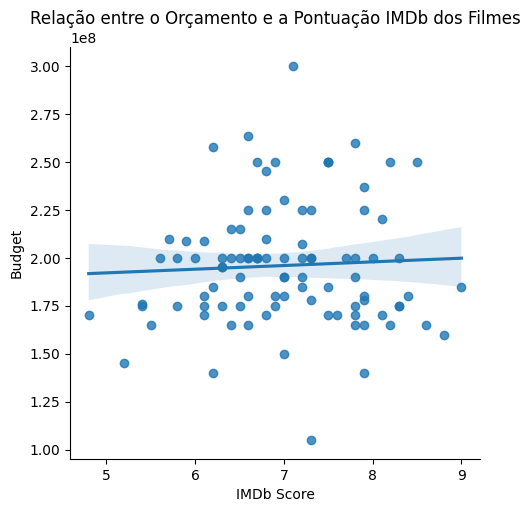

In [66]:
# Existe relação entre os melhores filme e seu Budget?
df_budget_score = df_movies.dropna(subset=['budget', 'imdb_score'])

plt.figure(figsize=(10, 6))

sns.lmplot(y='budget', x='imdb_score', data=df_budget_score)

plt.title('Relação entre o Orçamento e a Pontuação IMDb dos Filmes')
plt.xlabel('IMDb Score')
plt.ylabel('Budget')

In [64]:
#Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?
director_scores_budgets = df_movies.groupby('director_name').agg(
    avg_imdb_score=('imdb_score', 'mean'), avg_budget=('budget', 'mean')).sort_values(by='avg_imdb_score', ascending=False)

best_director = director_scores_budgets.iloc[0]

print(f"O melhor diretor é '{best_director.name}' com uma média de IMDb score de {best_director['avg_imdb_score']:.2f}.")
print(f"O orçamento médio dos filmes dirigidos por '{best_director.name}' é de ${best_director['avg_budget']:.2f}.")

O melhor diretor é 'Christopher Nolan' com uma média de IMDb score de 8.72.
O orçamento médio dos filmes dirigidos por 'Christopher Nolan' é de $190000000.00.


Text(0.5, 0, 'Ano')

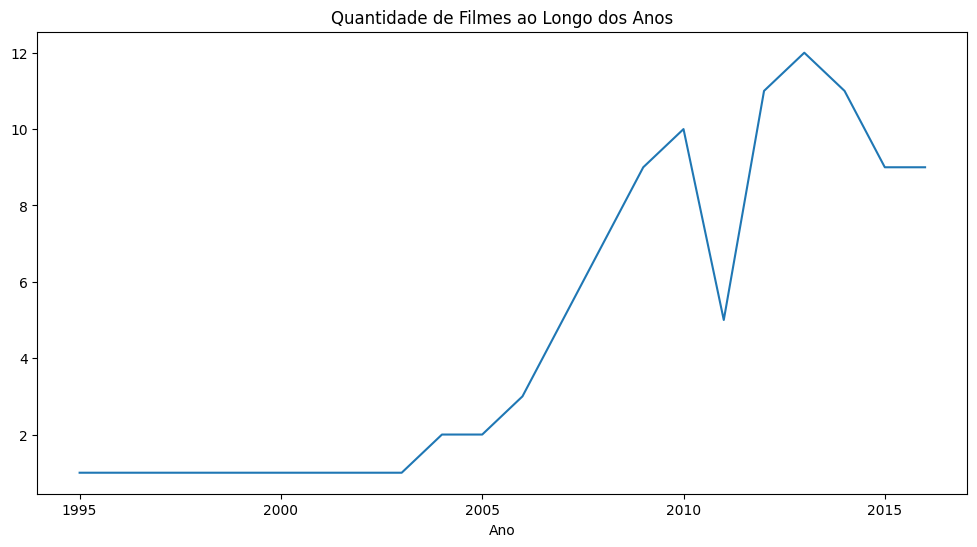

In [65]:
# Mostre num gráfico a quantidade de filmes ao passar do ano
movies_per_year = df_movies['title_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)

plt.title('Quantidade de Filmes ao Longo dos Anos')
plt.xlabel('Ano')